In [1]:
#KNN
#https://www.kaggle.com/code/lohitha17/titanic-survival-prediction-using-knn-classifier

In [6]:
import pandas as pd

# Assuming your test data is in a file named 'test_data.csv'
test_data = pd.read_csv('test.csv')

# Display the first few rows of the DataFrame
print(test_data.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [11]:
# Importing related Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.shape

(891, 12)

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df = df.drop('Name', axis=1,)
df = df.drop('Ticket', axis=1,)
df = df.drop('Fare', axis=1,)
df = df.drop('Cabin', axis=1,)

In [17]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [18]:
df = df.drop('SibSp', axis=1,)
df = df.drop('Parch', axis=1,)

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.613459
min,1.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,11.000000


In [20]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,1.904602
std,257.353842,0.486592,0.836071,13.019697,1.613459
min,1.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,11.000000


In [22]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df['Embarked'].isna().sum()

2

In [24]:
print(df["Embarked"].mode())
df["Embarked"] = df["Embarked"].fillna("S")

0    S
Name: Embarked, dtype: object


In [25]:
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [26]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [28]:
df.Sex.replace(['male', 'female'], [1,0], inplace=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,1,22.0,1,2
1,2,1,1,0,38.0,2,2
2,3,1,3,0,26.0,1,1
3,4,1,1,0,35.0,1,2
4,5,0,3,1,35.0,1,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate

In [31]:
X = np.array(df.filter(['Pclass','Sex','Embarked','Family','Age'], axis=1))

In [32]:
y = np.array(df.filter(['Survived'], axis=1))

In [34]:
X_1, X_test, y_1, y_test = train_test_split(X,y, test_size=0.3)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [35]:
final_scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 71

 CV accuracy for k=3 is 73

 CV accuracy for k=5 is 73

 CV accuracy for k=7 is 74

 CV accuracy for k=9 is 74

 CV accuracy for k=11 is 73

 CV accuracy for k=13 is 73

 CV accuracy for k=15 is 70

 CV accuracy for k=17 is 71

 CV accuracy for k=19 is 68

 CV accuracy for k=21 is 68

 CV accuracy for k=23 is 65

 CV accuracy for k=25 is 65

 CV accuracy for k=27 is 66

 CV accuracy for k=29 is 64


In [36]:
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)

3


In [37]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop('Name', axis=1,)
df_test = df_test.drop('Ticket', axis=1,)
df_test = df_test.drop('Fare', axis=1,)
df_test = df_test.drop('Cabin', axis=1,)
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test = df_test.drop('SibSp', axis=1,)
df_test = df_test.drop('Parch', axis=1,)
df_test["Age"] = df_test["Age"].fillna(df["Age"].median())

In [40]:
df_test1 = pd.read_csv('test.csv')
df_test1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
print(df_test["Embarked"].mode())
df_test["Embarked"] = df_test["Embarked"].fillna("S")

0    S
Name: Embarked, dtype: object


In [42]:
df_test.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
df_test.Sex.replace(['male', 'female'], [1,0], inplace=True)

In [43]:
X_test = np.array(df_test.filter(['Pclass','Sex','Embarked','Family','Age'], axis=1))
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_tr, y_tr)
pred = knn.predict(X_test)
print(pred)

[0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1
 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 1]


In [44]:
df_test['Survived'] = pd.Series(pred, index=df_test.index)

In [45]:
df_test

,PassengerId,Pclass,Sex,Age,Embarked,Family,Survived
0,892,3,1,34.5,3,1,0
1,893,3,0,47.0,1,2,0
2,894,2,1,62.0,3,1,0
3,895,3,1,27.0,1,1,0
4,896,3,0,22.0,1,3,1
...,...,...,...,...,...,...,...
413,1305,3,1,28.0,1,1,0
414,1306,1,0,39.0,2,1,0
415,1307,3,1,38.5,1,1,0
416,1308,3,1,28.0,1,1,0


In [46]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)

In [47]:
final_df.shape

(418, 2)

In [48]:
final_df.to_csv("pred_survival.csv", encoding='utf-8')

In [1]:
#naive bayes
#https://www.kaggle.com/code/dimitreoliveira/naive-bayes-probabilistic-ml-titanic-survival/notebook

In [3]:
import pandas as pd

train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
test_ids = test_raw['PassengerId'].values

# Join data to analyze and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
data = train_raw.append(test_raw, sort=False)


C:\Users\FAHAD\AppData\Local\Temp\ipykernel_13428\60649101.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train_raw.append(test_raw, sort=False)


In [4]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

data = data[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
data['Sex'] = data['Sex'].replace(["female", "male"], [0, 1])
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
data['Age'] = pd.qcut(data['Age'], 10, labels=False)

In [5]:
# Split data into train and test.
train = data.query('train == 1')
test = data.query('train == 0')

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_13428\3080450144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(axis=0, inplace=True)


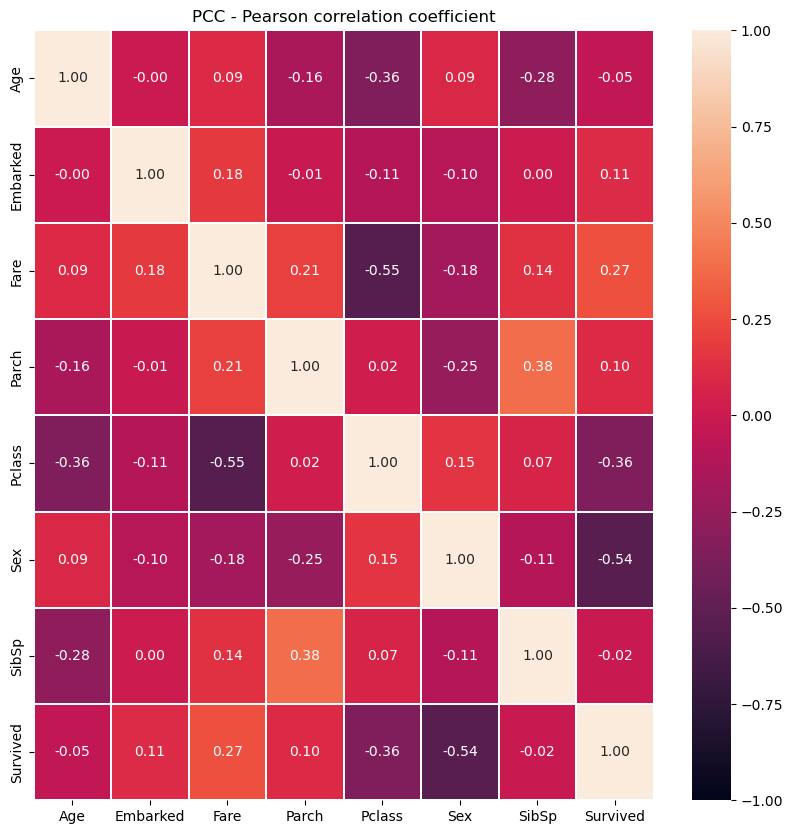

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
columns = train[features + [target]].columns.tolist()
nColumns = len(columns)
result = pd.DataFrame(np.zeros((nColumns, nColumns)), columns=columns)

# Apply Pearson correlation on each pair of features.
for col_a in range(nColumns):
    for col_b in range(nColumns):
        result.iloc[[col_a], [col_b]] = pearsonr(train.loc[:, columns[col_a]], train.loc[:, columns[col_b]])[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(result, yticklabels=columns, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.2)
ax.set_title('PCC - Pearson correlation coefficient')
plt.show()


C:\Users\FAHAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


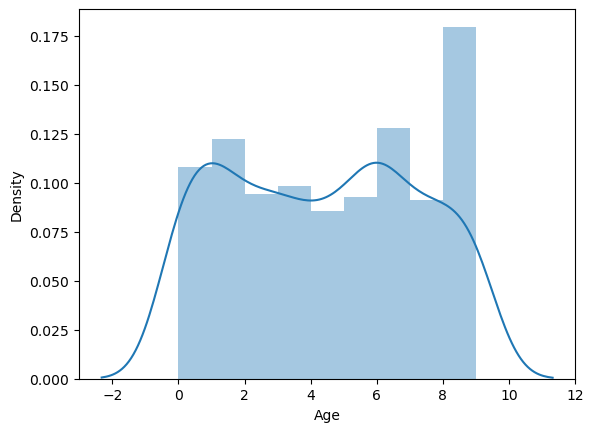

C:\Users\FAHAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


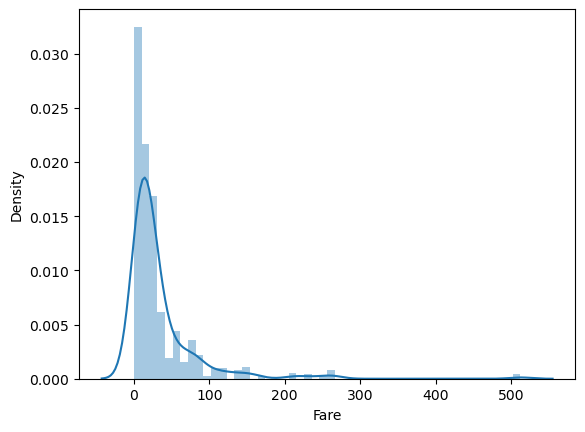

C:\Users\FAHAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


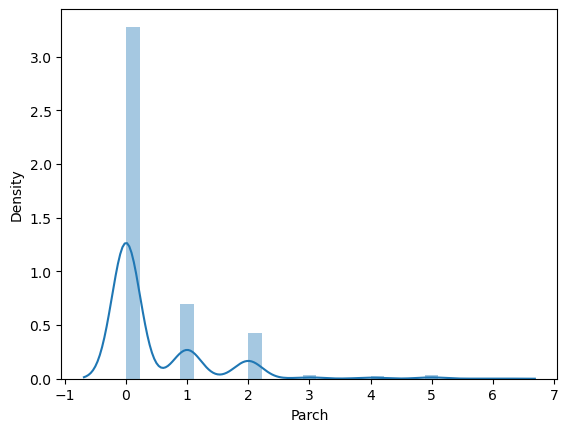

C:\Users\FAHAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


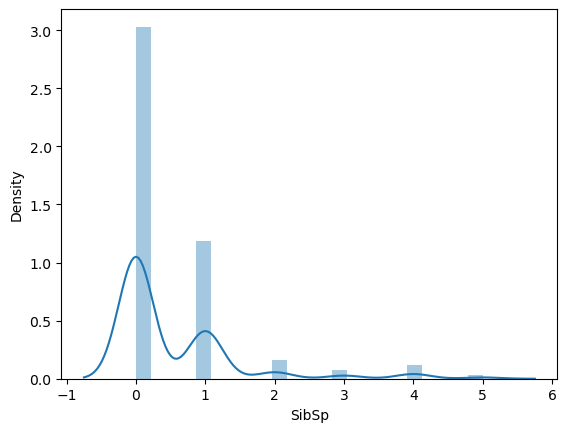

In [8]:
continuous_numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in continuous_numeric_features:
    sns.distplot(train[feature])
    plt.show()

In [9]:
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_13428\2590513945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
C:\Users\FAHAD\AppData\Local\Temp\ipykernel_13428\2590513945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['train', target, 'Pclass'], axis=1, inplace=True)


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame and 'labels' is your target variable
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)


In [13]:
X_train.head()

,Age,Embarked,Fare,Parch,Sex,SibSp
830,1.0,2.0,14.4542,0,0,1
566,1.0,1.0,7.8958,0,1,0
149,7.0,1.0,13.0000,0,1,0
106,2.0,1.0,7.6500,0,0,0
290,4.0,1.0,78.8500,0,0,0


In [14]:
X_train1, X_train2, Y_train1, Y_train2 = train_test_split(X_train, Y_train, test_size=0.3, random_state=12)

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming 'train' is your DataFrame and 'labels' is your target variable
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()


In [17]:
classifier.fit(X_train2, Y_train2)


GaussianNB()

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB

# Assuming 'train' is your DataFrame and 'labels' is your target variable
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

print('Metrics with only 30% of train data')
cross_validate(classifier, X_train, Y_train, cv=5)  # Adjust cv parameter as needed


Metrics with only 30% of train data


{'fit_time': array([0.00201011, 0.00099897, 0.00199819, 0.00100064, 0.00115037]),
 'score_time': array([0.0009985 , 0.00100064, 0.        , 0.00099683, 0.00100422]),
 'test_score': array([0.80701754, 0.74561404, 0.84210526, 0.78070175, 0.73451327])}

In [21]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate

# Assuming 'train' is your DataFrame and 'labels' is your target variable
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Initial call to partial_fit with classes parameter
classes = np.unique(Y_train)
classifier.partial_fit(X_train, Y_train, classes=classes)

# Subsequent calls to partial_fit without classes parameter
classifier.partial_fit(X_train, Y_train)



GaussianNB()

In [24]:
# Assuming 'target_column' is the correct column name in your DataFrame
Y_train_single_column = Y_train['target_column']

# Now you can use cross_validate with the single-column target variable
cross_validate(classifier, X_train, Y_train_single_column, cv=5)



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [25]:
print(Y_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [26]:
print(Y_train[:5])


[1. 0. 0. 1. 1.]


In [28]:
print(Y_train.shape)


(569,)


In [29]:
print('Probability of each class')
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])

Probability of each class
Survive = 0: 0.60
Survive = 1: 0.40


In [30]:
print('Mean of each feature per class')
print('               Age         Embarked   Fare         Parch       Sex         SibSp')
print('Survive = 0: %s' % classifier.theta_[0])
print('Survive = 1: %s' % classifier.theta_[1])

Mean of each feature per class
               Age         Embarked   Fare         Parch       Sex         SibSp
Survive = 0: [ 4.5339233   1.23893805 22.97357316  0.37463127  0.86135693  0.5280236 ]
Survive = 1: [ 4.27391304  1.33478261 53.52155957  0.52608696  0.33043478  0.49130435]


In [31]:
print('Variance of each feature per class')
print('Survive = 0: %s' % classifier.sigma_[0])
print('Survive = 1: %s' % classifier.sigma_[1])

Variance of each feature per class
Survive = 0: [8.32554825e+00 2.88044225e-01 8.60096730e+02 8.36055468e-01
 1.19424043e-01 1.11647419e+00]
Survive = 1: [8.45106148e+00 2.74880002e-01 5.28959488e+03 6.75409303e-01
 2.21250512e-01 4.41231609e-01]


C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
# Unfortunately sklearn naive Bayes algorithm currently do not make inference with missing data (but should do), so we need to input missing data.
test.fillna(test.mean(), inplace=True)
test_predictions = classifier.predict(test)
submission = pd.DataFrame({'PassengerId': test_ids})
submission['Survived'] = test_predictions.astype('int')
submission.to_csv('submission.csv', index=False)
submission.head(10)

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_13428\1501077118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.fillna(test.mean(), inplace=True)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
